In [71]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats

Задача 1

In [63]:
# Завантажити таблицю і вибрати дані свого варіанту (№2)
dt = pd.read_excel("таблица.xlsx", usecols="B")
# Варіаційний ряд
data_sort = np.sort(dt, axis=None)
dt = pd.Series(data_sort)
dt

0      0.206
1      0.210
2      0.245
3      0.277
4      0.296
       ...  
105    0.880
106    0.881
107    0.889
108    0.917
109    0.936
Length: 110, dtype: float64

(array([0.498132  , 0.62266501, 1.61892902, 1.24533001, 1.74346202,
        2.36612702, 2.36612702, 1.12079701, 1.12079701, 0.99626401]),
 array([0.206, 0.279, 0.352, 0.425, 0.498, 0.571, 0.644, 0.717, 0.79 ,
        0.863, 0.936]),
 <a list of 10 Patch objects>)

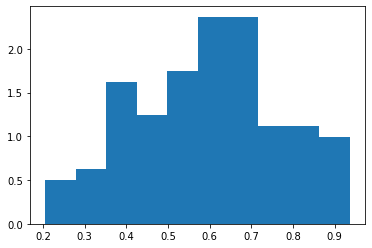

In [11]:
# Гістограма
plt.hist(dt, density=True)

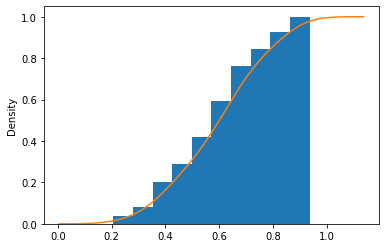

In [9]:
# Графік реалізації емпіричної функції розподілу
plt.hist(dt, density=True, cumulative=True)
sns.kdeplot(dt, cumulative=True)

In [72]:
from scipy.stats import norm
# Параметри нормального розподілу: середнє значення та середньоквадратичне відхилення
mu, sigma  =scipy.stats.distributions.norm.fit(dt)
mu, sigma

(160.0, 98.2344135219425)

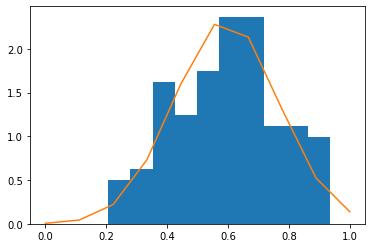

In [60]:
# Будуємо гістограму і щільність теоретичного розподілу для нормального розподілу
ix = np.linspace(0,1,10)
N_fitted_dt = scipy.stats.distributions.norm.pdf(ix, mu, sigma)
plt.hist(dt, density=True)
plt.plot(ix,N_fitted_dt)

In [73]:
from scipy.stats import t
# Параметри для розподілу Стьюдента: кількість ступенів свободи, середнє значення, середньоквадратичне відхилення
x, loc, scale  =scipy.stats.distributions.t.fit(dt)
x, loc, scale

(109212.47082460571, 159.99971258561095, 98.23395188534136)

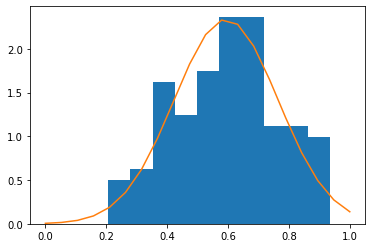

In [61]:
# Будуємо гістограму та щільність геометричного розподілу
Ox = np.linspace(0,1,20)
t_fitted_dt = scipy.stats.distributions.t.pdf(Ox, x, loc, scale)
plt.hist(dt, density=True)
plt.plot(Ox, t_fitted_dt)

Задача 2

In [74]:
from scipy.stats import gamma
# Знайти методом максимальної правдоподібності оцінку параметра бета
dt=pd.Series([50, 75, 125, 250, 300])
alpha=1.12
beta=np.mean(dt)/alpha
beta

142.85714285714283

Задача 3

In [75]:
# Оцінка параметрів альфа і бета методом моментів
mean = np.mean(dt)
std = np.std(dt)
alpha = (mean/std)**2
beta = (std**2)/mean
alpha, beta

(2.6528497409326426, 60.3125)